In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import csv

students = pd.read_csv(
    "/Users/aashishsukhija/Desktop/year2/python_project/students.csv",  quotechar='"', quoting=csv.QUOTE_MINIMAL)
#    sep=";",
 #   quotechar='"',
  #  quoting=csv.QUOTE_MINIMAL
    # quatotations in text values except numbers
    # seperator being used also appears in text panda wont be abel to load it.


print(students.head())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aashishsukhija/Desktop/year2/python_project/students.csv'

In [25]:
print(students.shape)
print(students.dtypes)

(349, 21)
sex           object
age            int64
famsize       object
Pstatus       object
Mjob          object
Fjob          object
guardian      object
studytime      int64
schoolsup     object
famsup        object
paid          object
activities    object
internet      object
romantic      object
famrel         int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
success         bool
dtype: object


In [ ]:
students = students.rename(columns={
    "Mjob": "Mother_Job",
    "Fjob": "Father_Job",
    "Pstatus": "Parent_Status",
    "famsize": "Family_Size",
    "studytime": "Study_Time",
    "schoolsup": "School_Support",
    "famsup": "Family_Support",
    "paid" : "Paid_classes",
    "famrel" : "Relationship_with_family",
    "goout": "Go_Out",
    "Dalc": "Daily_Alcohol",
    "Walc": "Weekend_Alcohol"
})

In [27]:
students["sex"] = students["sex"].replace({
    "M": "Male",
    "F": "Female"
})
students["Parent_Status"] = students["Parent_Status"].replace({
    "T": "living together",
    "A": "living apart"
})

students["Family_Size"] = students["Family_Size"].replace({
    "LE3" : "less or equal to 3",
    "GT3": "greater than 3"
})


In [28]:
# Question 1:
# What is the proportion of students that failed the class? 
# Proportion of failed students
fails = (students["success"] == False).sum()
total = len(students)
print(f"Failure rate: {fails / total * 100:.2f}%")

Failure rate: 32.38%


In [29]:
# Question 2:
# How are different variables (age, gender, internet access, family composition, etc.) distributed in the dataset?

In [30]:
categorical_cols = ["sex","Family_Size","Parent_Status","Mother_Job","Father_Job","guardian","School_Support","Family_Support","Paid_classes","activities","internet","romantic","success"]

numeric_cols = ["age","Study_Time","Relationship_with_family","Go_Out","Daily_Alcohol","Weekend_Alcohol","health","absences"]

In [31]:
numeric_summary = students[numeric_cols].agg(['mean', 'median', 'min', 'max']).T
numeric_summary

,mean,median,min,max
age,16.521490,16.0,15.0,22.0
Study_Time,2.063037,2.0,1.0,4.0
Relationship_with_family,3.959885,4.0,1.0,5.0
Go_Out,3.111748,3.0,1.0,5.0
Daily_Alcohol,1.444126,1.0,1.0,5.0
Weekend_Alcohol,2.260745,2.0,1.0,5.0
health,3.575931,4.0,1.0,5.0
absences,5.965616,4.0,0.0,75.0


In [32]:
categorical_summary = pd.DataFrame({
    'Unique Values': [students[col].nunique() for col in categorical_cols],
    'Most Frequent': [students[col].mode()[0] for col in categorical_cols],
    'Frequency (%) of the Most Frequent': [
        students[col].value_counts(normalize=True).iloc[0] * 100
        for col in categorical_cols
    ]
}, index=categorical_cols)

categorical_summary

,Unique Values,Most Frequent,Frequency (%) of the Most Frequent
sex,2,Female,52.435530
Family_Size,2,greater than 3,72.206304
Parent_Status,2,living together,89.111748
Mother_Job,5,other,34.957020
Father_Job,5,other,56.160458
guardian,3,mother,70.200573
School_Support,2,no,85.386819
Family_Support,2,yes,64.183381
Paid_classes,2,no,53.868195
activities,2,yes,53.008596


In [ ]:
# Demographic & Background Variables

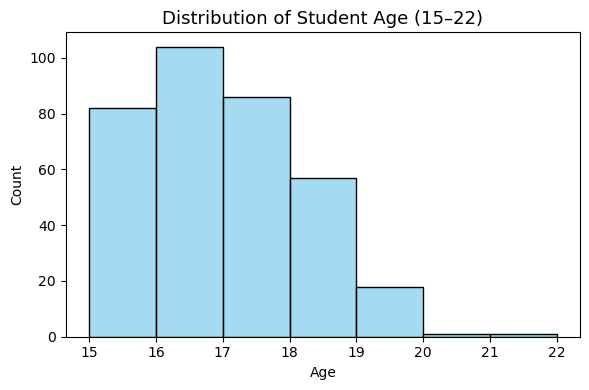

In [80]:
plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=students,x="age", bins=range(15, 23), color="skyblue", edgecolor="black")
plt.title("Distribution of Student Age (15–22)", fontsize=13)
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/var/folders/sh/706c5bx96g36pfp_h97vt_3r0000gn/T/ipykernel_94129/273796478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=students, x="sex", palette=["#8ecae6", "#f4a261"])


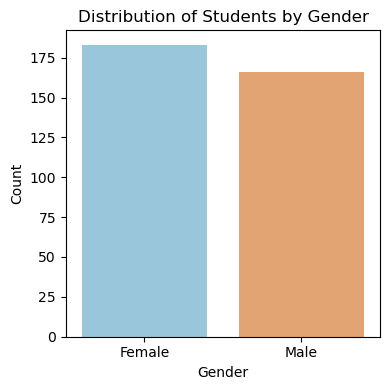

In [78]:
plt.figure(figsize=(4, 4))
sns.countplot(data=students, x="sex", palette=["#8ecae6", "#f4a261"])
plt.title("Distribution of Students by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

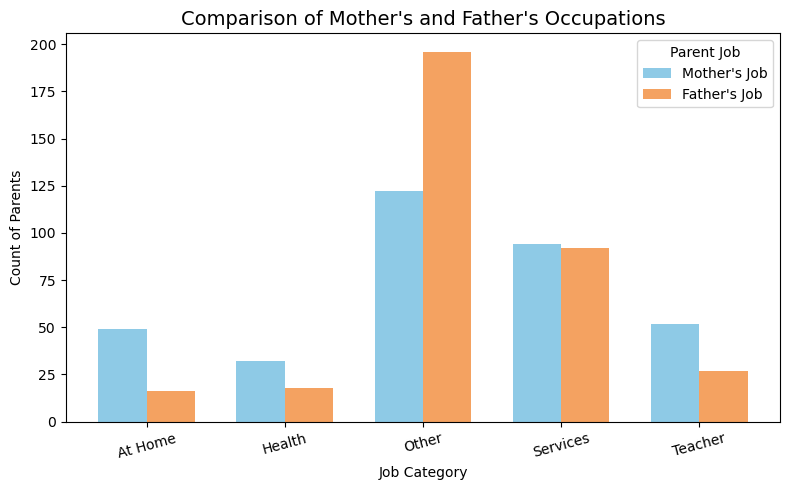

In [73]:
# Prepare counts for each category
mother_counts = students["Mother_Job"].value_counts().reindex(
    ["at_home", "health", "other", "services", "teacher"], fill_value=0
)
father_counts = students["Father_Job"].value_counts().reindex(
    ["at_home", "health", "other", "services", "teacher"], fill_value=0
)

# Define x positions and bar width
x = np.arange(len(mother_counts))
width = 0.35

# Plot bars side by side
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, mother_counts, width, color="#8ecae6", label="Mother's Job")
plt.bar(x + width/2, father_counts, width, color="#f4a261", label="Father's Job")

# Relabeled tick names for clarity
display_labels = ["At Home", "Health", "Other", "Services", "Teacher"]
plt.xticks(x, display_labels, rotation=15)

# Aesthetic details
plt.xlabel("Job Category")
plt.ylabel("Count of Parents")
plt.title("Comparison of Mother's and Father's Occupations", fontsize=14)
plt.legend(title="Parent Job")
plt.tight_layout()
plt.show()

In [ ]:
# Academic Engagement Variables

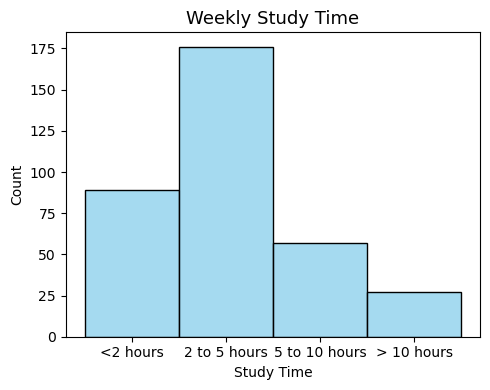

In [79]:
plt.figure(figsize=(5, 4))
ax = sns.histplot(
    data=students,
    x="Study_Time",
    bins=range(1, 6),  # 1 to 4 inclusive
    color="skyblue",
    edgecolor="black"
)
# Set custom labels for numeric categories
ax.set_xticks([1.5, 2.5, 3.5, 4.5])
ax.set_xticklabels(["<2 hours", "2 to 5 hours", "5 to 10 hours", "> 10 hours"])

plt.title("Weekly Study Time", fontsize=13)
plt.xlabel("Study Time")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

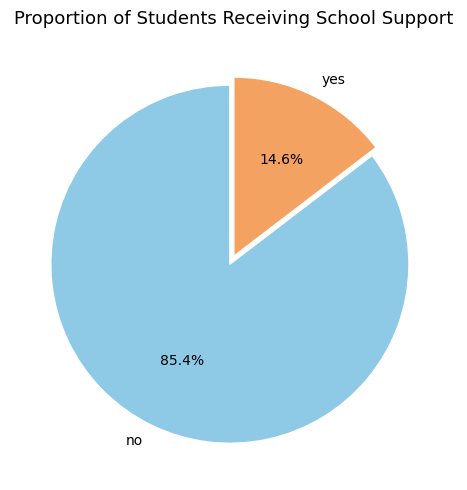

In [51]:
# Count the categories
support_counts = students["School_Support"].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=["#8ecae6", "#f4a261"],
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students Receiving School Support", fontsize=13)
plt.tight_layout()
plt.show()

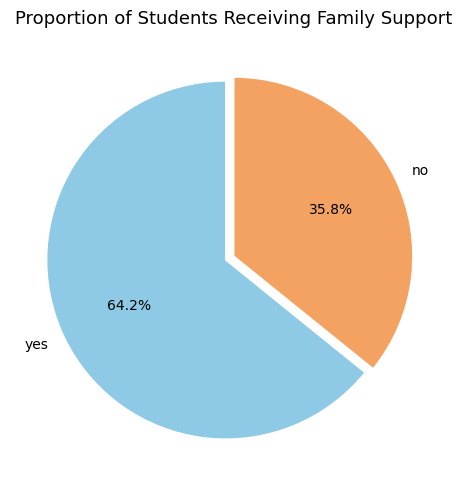

In [54]:
# Count the categories
support_counts = students["Family_Support"].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=["#8ecae6", "#f4a261"],
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students Receiving Family Support", fontsize=13)
plt.tight_layout()
plt.show()

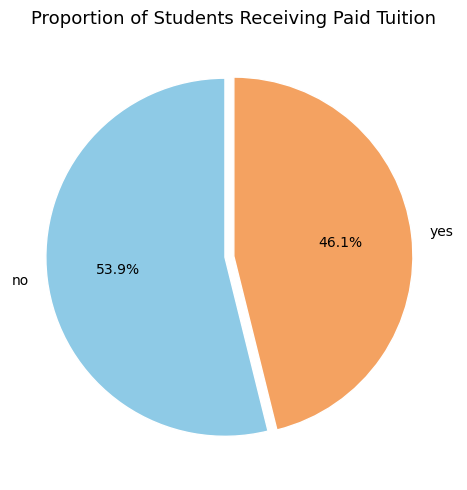

In [55]:
# Count the categories
support_counts = students["Paid_classes"].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=["#8ecae6", "#f4a261"],
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students Receiving Paid Tuition", fontsize=13)
plt.tight_layout()
plt.show()

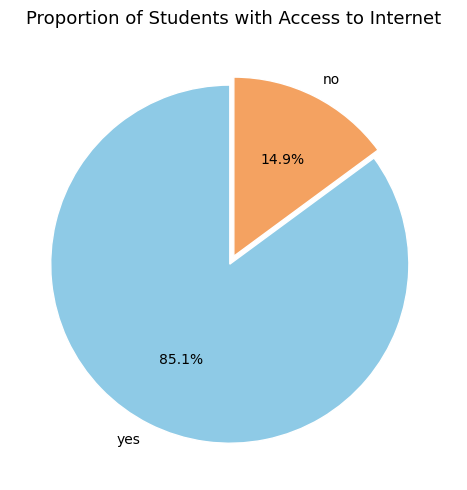

In [57]:
# Count the categories
support_counts = students["internet"].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    support_counts,
    labels=support_counts.index,
    autopct='%1.1f%%',
    colors=["#8ecae6", "#f4a261"],
    startangle=90,
    explode=(0.05, 0),
    wedgeprops={"edgecolor": "white"}
)

plt.title("Proportion of Students with Access to Internet", fontsize=13)
plt.tight_layout()
plt.show()

In [ ]:
# Social & Lifestyle Variables; activities and romance, write about them from the table
# Health & Well-being Variables

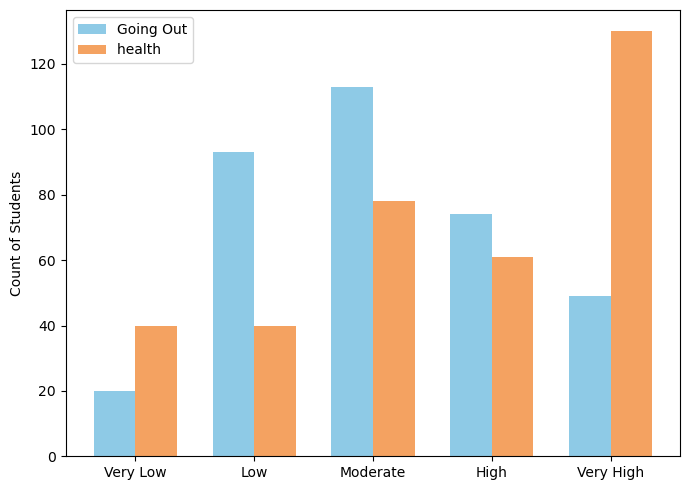

In [ ]:
# Prepare data
out_counts = students["Go_Out"].value_counts().sort_index()
health_counts = students["health"].value_counts().sort_index()

# Define x positions and bar width
x = np.arange(1, 6)  # 1 to 5 levels
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, out_counts, width, color="#8ecae6", label="Meeting friends")
plt.bar(x + width/2, health_counts, width, color="#f4a261", label="Healthy")

# Customize
plt.xticks(x, ["Very Low", "Low", "Moderate", "High", "Very High"])
plt.xlabel("")
plt.ylabel("Count of Students")
plt.title("", fontsize=14)
plt.legend(title="")
plt.tight_layout()
plt.show()
# maybe they cannot concentrate more when there health is not best, but they dont go outwhen is better, they study nmore at at home using. lets see with health and no of hours

In [4]:
# Prepare data
daily_counts = students["Daily_Alcohol"].value_counts().sort_index()
weekend_counts = students["Weekend_Alcohol"].value_counts().sort_index()

# Define x positions and bar width
x = np.arange(1, 6)  # 1 to 5 levels
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, daily_counts, width, color="#8ecae6", label="Daily Alcohol")
plt.bar(x + width/2, weekend_counts, width, color="#f4a261", label="Weekend Alcohol")

# Customize
plt.xticks(x, ["Very Low", "Low", "Moderate", "High", "Very High"])
plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Count of Students")
plt.title("Daily vs Weekend Alcohol Consumption", fontsize=14)
plt.legend(title="Type of Day")
plt.tight_layout()
plt.show()

NameError: name 'students' is not defined

In [3]:
numeric_cols = ["age","Study_Time","Relationship_with_family","Go_Out","Daily_Alcohol","Weekend_Alcohol","health","absences"]

In [104]:
# How do variables interact with each other?
# 1. Are age, absences, family composition, etc. distributed similarly for both genders?
# 2. What are the age, gender, internet access, alcohol consumption, etc. distributions by parents cohabitation status?
# ...
# etc..

In [2]:
students.groupby("sex")[["age", "absences", "Go_Out", "Weekend_Alcohol", "Daily_Alcohol", "Relationship_with_family", "Study_Time"]].corr()

NameError: name 'students' is not defined

In [116]:
# 2. What are the age, gender, internet access, alcohol consumption, guardian etc. distributions by parents cohabitation status?


In [ ]:
# 3. Health and study time

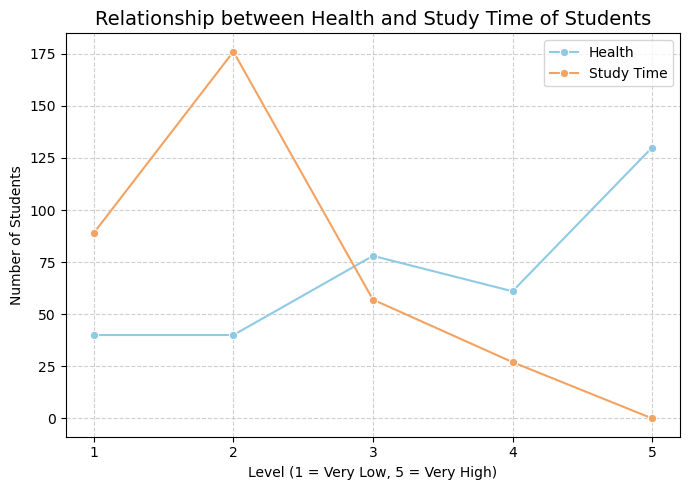

In [121]:
# Count frequency for each level (1–5)
health_counts = students["health"].value_counts().sort_index()
studytime_counts = students["Study_Time"].value_counts().sort_index()

# Ensure both series have same x range (1 to 5)
x = np.arange(1, 6)

# Smooth line plot
plt.figure(figsize=(7, 5))
sns.lineplot(x=x, y=health_counts.reindex(x, fill_value=0), marker="o", label="Health", color="#8ecae6")
sns.lineplot(x=x, y=studytime_counts.reindex(x, fill_value=0), marker="o", label="Study Time", color="#f4a261")

# Customize plot
plt.xticks(x, ["1", "2", "3", "4", "5"])
plt.xlabel("Level (1 = Very Low, 5 = Very High)")
plt.ylabel("Number of Students")
plt.title("Relationship between Health and Study Time of Students", fontsize=14)
plt.legend(title="")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# going out and weekend drinking

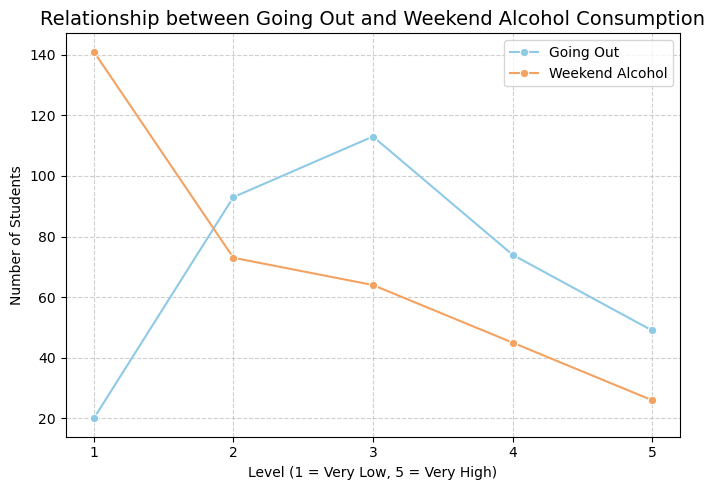

In [118]:
# Count frequency for each level (1–5)
goout_counts = students["Go_Out"].value_counts().sort_index()
weekend_counts = students["Weekend_Alcohol"].value_counts().sort_index()

# Ensure both series have same x range (1 to 5)
x = np.arange(1, 6)

# Smooth line plot
plt.figure(figsize=(7, 5))
sns.lineplot(x=x, y=goout_counts.reindex(x, fill_value=0), marker="o", label="Going Out", color="#8ecae6")
sns.lineplot(x=x, y=weekend_counts.reindex(x, fill_value=0), marker="o", label="Weekend Alcohol", color="#f4a261")

# Customize plot
plt.xticks(x, ["1", "2", "3", "4", "5"])
plt.xlabel("Level (1 = Very Low, 5 = Very High)")
plt.ylabel("Number of Students")
plt.title("Relationship between Going Out and Weekend Alcohol Consumption", fontsize=14)
plt.legend(title="")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [119]:
# Average alcohol & studytime by success

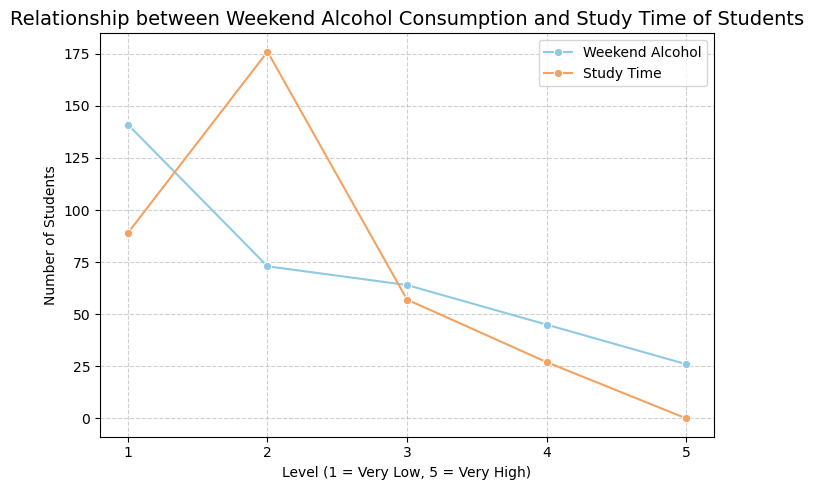

In [120]:
# Count frequency for each level (1–5)
weekend_counts = students["Weekend_Alcohol"].value_counts().sort_index()
studytime_counts = students["Study_Time"].value_counts().sort_index()

# Ensure both series have same x range (1 to 5)
x = np.arange(1, 6)

# Smooth line plot
plt.figure(figsize=(7, 5))
sns.lineplot(x=x, y=weekend_counts.reindex(x, fill_value=0), marker="o", label="Weekend Alcohol", color="#8ecae6")
sns.lineplot(x=x, y=studytime_counts.reindex(x, fill_value=0), marker="o", label="Study Time", color="#f4a261")

# Customize plot
plt.xticks(x, ["1", "2", "3", "4", "5"])
plt.xlabel("Level (1 = Very Low, 5 = Very High)")
plt.ylabel("Number of Students")
plt.title("Relationship between Weekend Alcohol Consumption and Study Time of Students", fontsize=14)
plt.legend(title="")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 5. no of absences depends on? drinking, health, relationship with family.